In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Входная последовательность из 3 "токенов" с размерностью признаков 4
x = np.array([
    [1, 0, 1, 0],  # токен 1
    [0, 2, 0, 2],  # токен 2
    [1, 1, 1, 1]   # токен 3
], dtype=np.float32)

# Размерность внимания
d_k = x.shape[1]  # 4


In [4]:
W_q = np.random.rand(d_k, d_k)
W_k = np.random.rand(d_k, d_k)
W_v = np.random.rand(d_k, d_k)

Q = x @ W_q
K = x @ W_k
V = x @ W_v


In [5]:
# Attention scores
scores = Q @ K.T / np.sqrt(d_k)

# Softmax по строкам
attention_weights = np.exp(scores) / np.exp(scores).sum(axis=1, keepdims=True)

# Взвешенные суммы значений
output = attention_weights @ V


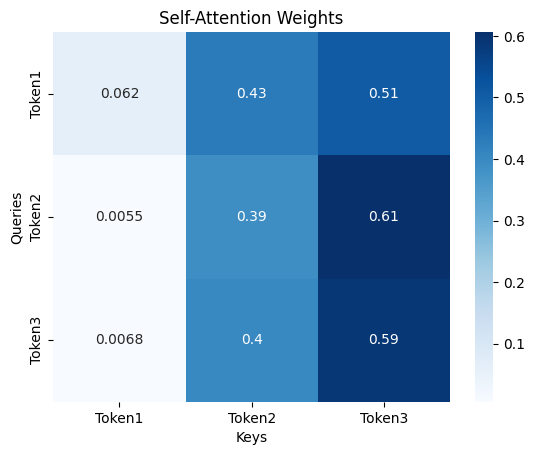

In [6]:
sns.heatmap(attention_weights, annot=True, cmap="Blues", xticklabels=["Token1", "Token2", "Token3"], yticklabels=["Token1", "Token2", "Token3"])
plt.title("Self-Attention Weights")
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.show()
